# **Unsupervised Learning Project: AllLife Bank Customer Segmentation**

# **Marks: 30**

Welcome to the project on Unsupervised Learning. We will be using **Credit Card Customer Data** for this project.

--------------------------------
## **Context** 
-------------------------------

**AllLife Bank wants to focus on its credit card customer base** in the next financial year. They have been advised by their marketing research team, that the penetration in the market can be improved. Based on this input, the marketing team proposes to run personalized campaigns to target new customers as well as upsell to existing customers. 

Another insight from the market research was that the customers perceive the support services of the bank poorly. Based on this, the operations team wants to upgrade the service delivery model, to ensure that customers' queries are resolved faster. The head of marketing and the head of delivery, both decide to reach out to the Data Science team for help.


----------------------------
## **Objective**
-----------------------------

**Identify different segments in the existing customer base**, taking into account their spending patterns as well as past interactions with the bank.

--------------------------
## **About the data**
--------------------------

Data is available on customers of the bank with their credit limit, the total number of credit cards the customer has, and different channels through which the customer has contacted the bank for any queries. These different channels include visiting the bank, online, and through a call center.

- Sl_no - Customer Serial Number
- Customer Key - Customer identification
- Avg_Credit_Limit	- Average credit limit (currency is not specified, you can make an assumption around this)
- Total_Credit_Cards - Total number of credit cards 
- Total_visits_bank	- Total bank visits
- Total_visits_online - Total online visits
- Total_calls_made - Total calls made

## **Importing libraries and overview of the dataset**

**Note:** Please make sure you have installed the sklearn_extra library before running the below cell. If you have not installed the library, please run the below code to install the library:

!pip install scikit-learn-extra

In [1]:
# Importing all the necessary packages

import pandas as pd

import numpy as np

import matplotlib.pylab as plt

import seaborn as sns

# To scale the data using z-score 
from sklearn.preprocessing import StandardScaler

# Importing clustering algorithms
from sklearn.cluster import KMeans

from sklearn.mixture import GaussianMixture

from sklearn_extra.cluster import KMedoids

import warnings
warnings.filterwarnings("ignore")

### **Loading the data**

In [2]:
import pandas as pd


data = pd.read_excel ('Credit+Card+Customer+Data.xlsx')


In [3]:
# There are some duplicates in the column 'Customer Key'. Let us explore

duplicate_keys = data['Customer Key'].duplicated()

data[duplicate_keys]

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
332,333,47437,17000,7,3,1,0
398,399,96929,67000,6,2,2,2
432,433,37252,59000,6,2,1,2
541,542,50706,60000,7,5,2,2
632,633,97935,187000,7,1,7,0


### **Check the info of the data**

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


**Observations:**

- There are **660 observations and 7 columns** in the dataset.
- All the columns have 660 non-null values, i.e., there are **no missing values**.
- **All the columns are of integer data type**.

**There are no missing values. Let us now figure out the number of unique values in each column.** 

In [13]:
data.nunique()

Sl_No                  660
Customer Key           655
Avg_Credit_Limit       110
Total_Credit_Cards      10
Total_visits_bank        6
Total_visits_online     16
Total_calls_made        11
dtype: int64

- Customer key, which is an identifier, has duplicate values. We will treat the duplicate customer keys before applying any algorithm.

## **Data Preprocessing and Exploratory Data Analysis**

### **Checking duplicate customer keys**

As mentioned above, the Customer Key column has duplicate values. Let's find the rows with duplicate customer keys.

### **Question 1: Drop the rows with duplicate customer keys (2 Marks)**

In [14]:
# There are some duplicates in the column 'Customer Key'. Let us explore

duplicate_keys = data['Customer Key'].duplicated()

data[duplicate_keys]


,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
332,333,47437,17000,7,3,1,0
398,399,96929,67000,6,2,2,2
432,433,37252,59000,6,2,1,2
541,542,50706,60000,7,5,2,2
632,633,97935,187000,7,1,7,0


- There are **5 duplicate customer keys**. We can **drop these observations**.

**Note:** We are not making any assumptions about which row with the duplicate keys should be dropped. For example, if row 2 and row 10 have duplicate customer keys, then any one of the two rows can be dropped.

In [15]:
# let's drop duplicate keys

data.drop_duplicates()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3
...,...,...,...,...,...,...,...
655,656,51108,99000,10,1,10,0
656,657,60732,84000,10,1,13,2
657,658,53834,145000,8,1,9,1
658,659,80655,172000,10,1,15,0


### **Dropping columns** 

We have done some basic checks. Now, **let's drop the variables that are not required for our analysis**.

In [16]:
data.drop(columns = ['Sl_No', 'Customer Key'], inplace = True)

### **Checking duplicate rows**

Now, that we have dropped unnecessary columns, we can again check for duplicates. **Duplicates would mean customers with identical features.**

In [17]:
data[data.duplicated()]

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
162,8000,2,0,3,4
175,6000,1,0,2,5
215,8000,4,0,4,7
295,10000,6,4,2,3
324,9000,4,5,0,4
361,18000,6,3,1,4
378,12000,6,5,2,1
385,8000,7,4,2,0
395,5000,4,5,0,1
455,47000,6,2,0,4


- There are 11 duplicate rows. We can drop these duplicate rows from the data.

In [18]:
data = data[~data.duplicated()]

In [19]:
data.shape

(649, 5)

- After removing the duplicate keys, the duplicate rows, and dropping unnecessary columns, there are 644 unique observations and 5 columns in our data.

### **Summary Statistics**

### **Question 2: Write your observations on the summary statistics of the data (1 Mark)**

In [20]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Avg_Credit_Limit,649.0,34878.274268,37813.736638,3000.0,11000.0,18000.0,49000.0,200000.0
Total_Credit_Cards,649.0,4.708783,2.173763,1.0,3.0,5.0,6.0,10.0
Total_visits_bank,649.0,2.397535,1.625148,0.0,1.0,2.0,4.0,5.0
Total_visits_online,649.0,2.624037,2.952888,0.0,1.0,2.0,4.0,15.0
Total_calls_made,649.0,3.590139,2.877911,0.0,1.0,3.0,5.0,10.0


**Observations:This summary suggests that customers have an average of $34,878 in credit limit across all of their total credit cards.
* The total amount of vists online is 3 times the number of visits in bank.
*The total amount of calls made by customers is twice as high as the tota visits in bank.

**Now, let's go ahead with exploring each variable at hand.**

### **Question 3: Check the distribution and outliers for each variable in the data.**

- **Check the distribution of all variables (use .hist() attribute) (2 Marks)**
- **Check outliers for all variables (use sns.boxplot()) (2 Mark)**
- **Write your observations (1 Marks)**

Avg_Credit_Limit
Skew : 2.19


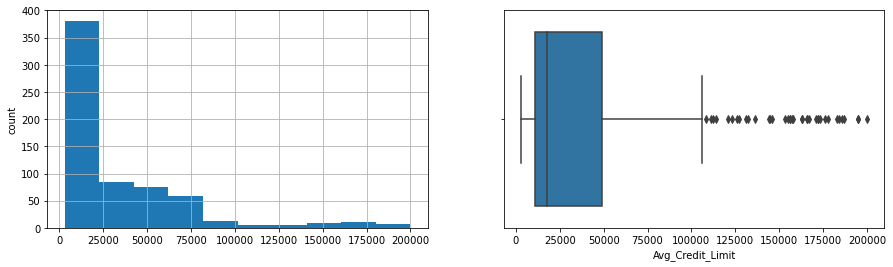

Total_Credit_Cards
Skew : 0.15


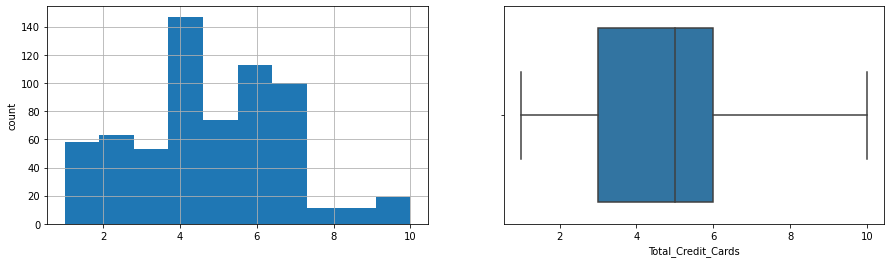

Total_visits_bank
Skew : 0.15


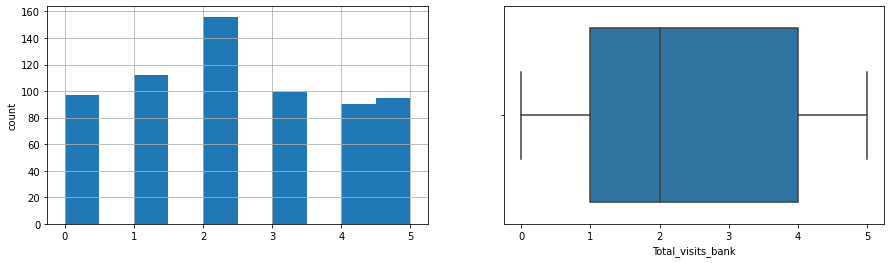

Total_visits_online
Skew : 2.21


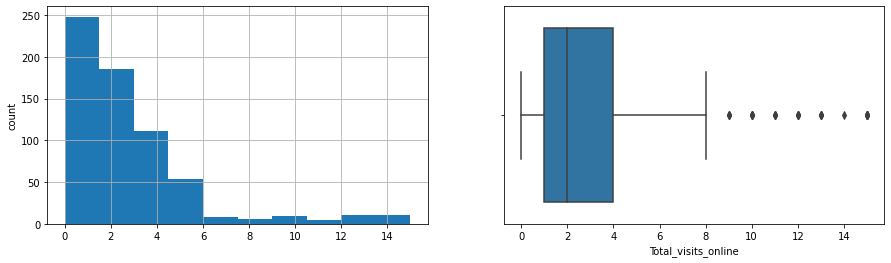

Total_calls_made
Skew : 0.66


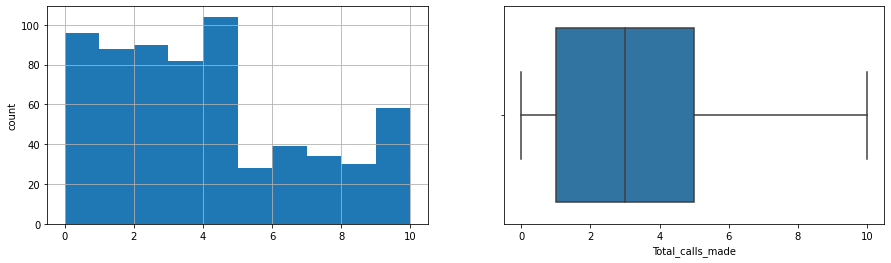

In [21]:
# complete the BELOW code by filling the blanks, before running the cell to avoid any errors 

for col in data.columns:
    print(col)
    
    print('Skew :', round(data[col].skew(), 2))
    
    plt.figure(figsize = (15, 4))
    
    plt.subplot(1, 2, 1)
    
    data[col].hist(bins=10,grid=True)
    
    plt.ylabel('count')
    
    plt.subplot(1, 2, 2)
    
    sns.boxplot(x = data[col])
    
    plt.show()

**Observation:   Observing the histogram and Boxplot of these distributions, we see that :
* The average of the credit limit distribution and The total amount of time customers visit online appears to be positive skewed and unimodal,  we also notice the presence of outliers to the right .the mean is pulled away from the median from extreme values and outliers.
* The total credit cards distribution; the total calls made from customers and the total visit in bank does not possess any outliers and are also right skewed.
**

### **Checking correlation**

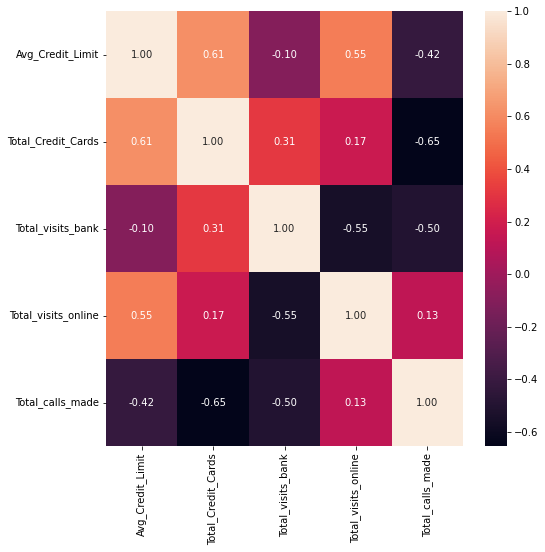

In [22]:
plt.figure(figsize = (8, 8))

sns.heatmap(data.corr(), annot = True, fmt = '0.2f')

plt.show()

**Observations:**

- Avg_Credit_Limit is positively correlated with Total_Credit_Cards and Total_visits_online which makes sense.
- Avg_Credit_Limit is negatively correlated with Total_calls_made and Total_visits_bank.
- Total_visits_bank, Total_visits_online, Total_calls_made are negatively correlated which implies that majority of customers use only one of these channels to contact the bank.

### **Scaling the data**

In [23]:
scaler = StandardScaler()

data_scaled = pd.DataFrame(scaler.fit_transform(data), columns = data.columns)

In [24]:
data_scaled.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1.723499,-1.247087,-0.860606,-0.550407,-1.248443
1,0.400209,-0.786701,-1.476410,2.499808,1.881237
2,0.400209,1.054846,-0.860606,0.127419,0.142526
3,-0.129107,0.134072,-0.860606,-0.550407,0.142526
4,1.723499,0.594459,-1.476410,3.177634,-0.205216


In [25]:
# Creating copy of the data to store labels from each algorithm

data_scaled_copy = data_scaled.copy(deep = True)

## **K-Means**

Let us now fit the K-means algorithm on our scaled data and find out the optimum number of clusters to use.

We will do this in 3 steps:
1. Initialize a dictionary to store the Sum of Squared Error (SSE) for each K
2. Run for a range of Ks and store SSE for each run
3. Plot the SSE vs K and plot the elbow curve

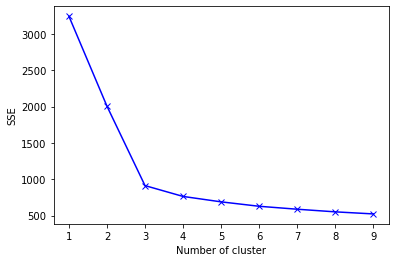

In [26]:
# step 1
sse = {} 

# step 2 - iterate for a range of Ks and fit the scaled data to the algorithm. 
for k in range(1, 10):
    kmeans = KMeans(n_clusters = k, max_iter = 1000, random_state = 1).fit(data_scaled)
    sse[k] = kmeans.inertia_     # Use inertia attribute from the clustering object and store the inertia value for that K

# step 3
plt.figure()

plt.plot(list(sse.keys()), list(sse.values()), 'bx-')

plt.xlabel("Number of cluster")

plt.ylabel("SSE")

plt.show()

### **Question 4:** 

- **Interpret the above elbow plot and state the reason for choosing K=3 (1 Mark)**
- **Fit the K-means algorithms on the scaled data with the number of clusters equal to 3 (2 Mark)**
- **Store the predictions as 'Labels' to the 'data_scaled_copy' and 'data' DataFrames (2 Marks)**

In [27]:
kmeans = KMeans(n_clusters = 3, random_state = 1)     # Apply the K-Means algorithm

kmeans.fit(data_scaled)                                # Fit the kmeans function on the scaled data                      
                          
# Adding predicted labels to the original data and the scaled data 
data_scaled_copy['Labels'] = kmeans.predict(data_scaled)     # Save the predictions on the scaled data from K-Means
data['Labels'] = kmeans.predict(data_scaled)          # Save the predictions on the scaled data from K-Means

We have generated the labels with K-means. Now, let us look at the various features based on the labels.

### **Question 5: Create the cluster profiles using the below summary statistics and box plots for each label (6 Marks)**

In [28]:
# Number of observations in each cluster
data.Labels.value_counts()

1    378
0    221
2     50
Name: Labels, dtype: int64

In [29]:
# Calculating summary statistics of the original data for each label
mean = data.groupby('Labels').mean()

median = data.groupby('Labels').median()

df_kmeans = pd.concat([mean, median], axis = 0)

df_kmeans.index = ['group_0 Mean', 'group_1 Mean', 'group_2 Mean', 'group_0 Median', 'group_1 Median', 'group_2 Median']

df_kmeans.T

,group_0 Mean,group_1 Mean,group_2 Mean,group_0 Median,group_1 Median,group_2 Median
Avg_Credit_Limit,12239.819005,34071.428571,141040.00,12000.0,32000.0,145500.0
Total_Credit_Cards,2.411765,5.518519,8.74,2.0,6.0,9.0
Total_visits_bank,0.945701,3.484127,0.60,1.0,3.0,1.0
Total_visits_online,3.561086,0.981481,10.90,4.0,1.0,11.0
Total_calls_made,6.891403,1.992063,1.08,7.0,2.0,1.0


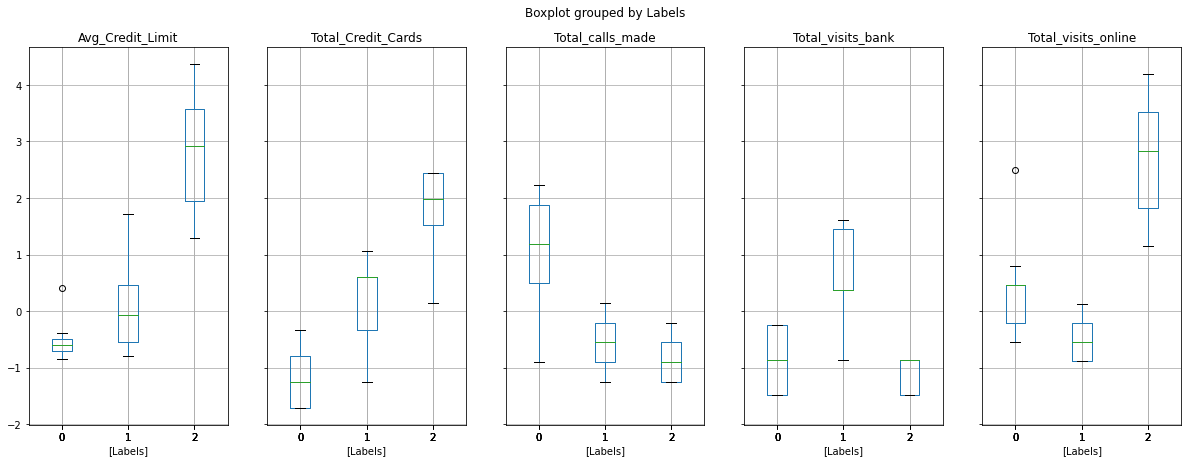

In [30]:
# Visualizing different features w.r.t K-means labels
data_scaled_copy.boxplot(by = 'Labels', layout = (1, 5), figsize = (20, 7))

plt.show()

**Cluster Profiles: From these cluster profiles we can see that 
* The customers in Cluster 0 are the ones  who makes the most calls to the bank and they have the  lowest credit limit and number of cards .
* In cluster 1, the customers who physicaly visits the bank tend to have the mid-range of credit cards and credit limit.
* Cluster 2 customers have a much higher credit limit and also have more credit cards, we see that they also have a positive online interactions with their bank.

## **Gaussian Mixture Model**

Let's now create clusters using the Gaussian Mixture Model.

### **Question 6:** 

- **Apply the Gaussian Mixture Model algorithm on the scaled data with n_components=3 and random_state=1 (2 Marks)** 
- **Create the cluster profiles using the below summary statistics and box plots for each label (2 Marks)**
- **Compare the clusters from both algorithms - K-means and Gaussian Mixture Model (1 Mark)**

In [39]:
 gmm = GaussianMixture(n_components = 3, random_state = 1) # Apply the Gaussian Mixture algorithm on the scaled data with n_components=3 and random_state=1

gmm.fit(data_scaled)    # Fit the model on the scaled data  

data_scaled_copy['GmmLabels'] = gmm.predict(data_scaled)

data['GmmLabels'] = gmm.predict(data_scaled)

In [40]:
# Number of observations in each cluster
data.GmmLabels.value_counts()

1    378
0    221
2     50
Name: GmmLabels, dtype: int64

In [41]:
# Calculating the summary statistics of the original data for each label
original_features = ["Avg_Credit_Limit", "Total_Credit_Cards", "Total_visits_bank", "Total_visits_online", "Total_calls_made"]

mean = data.groupby('GmmLabels').mean()

median = data.groupby('GmmLabels').median()

df_gmm = pd.concat([mean, median], axis = 0)

df_gmm.index = ['group_0 Mean', 'group_1 Mean', 'group_2 Mean', 'group_0 Median', 'group_1 Median', 'group_2 Median']

df_gmm[original_features].T

,group_0 Mean,group_1 Mean,group_2 Mean,group_0 Median,group_1 Median,group_2 Median
Avg_Credit_Limit,12239.819005,34071.428571,141040.00,12000.0,32000.0,145500.0
Total_Credit_Cards,2.411765,5.518519,8.74,2.0,6.0,9.0
Total_visits_bank,0.945701,3.484127,0.60,1.0,3.0,1.0
Total_visits_online,3.561086,0.981481,10.90,4.0,1.0,11.0
Total_calls_made,6.891403,1.992063,1.08,7.0,2.0,1.0


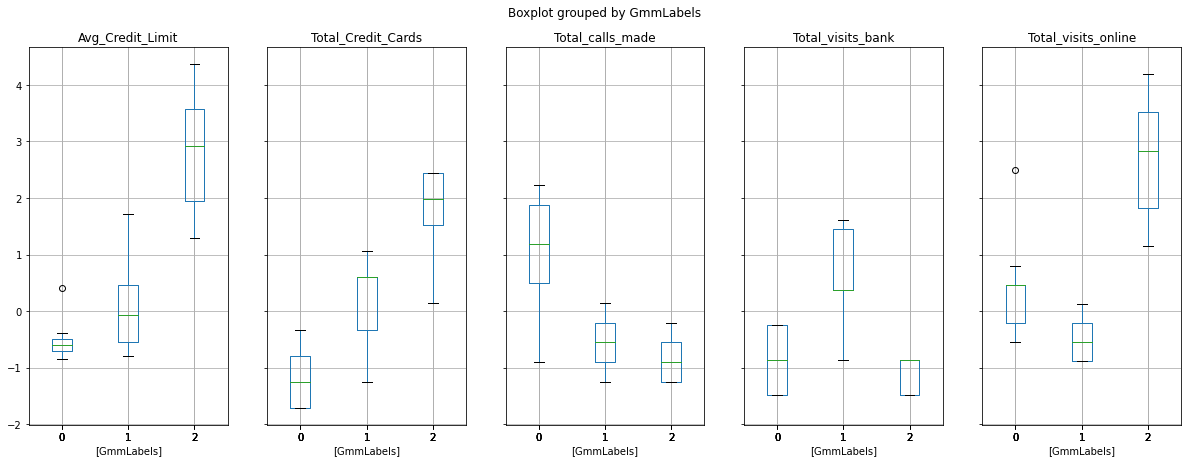

In [42]:
# Plotting boxplots with the new GMM based labels

features_with_lables = ["Avg_Credit_Limit", "Total_Credit_Cards", "Total_visits_bank", "Total_visits_online", "Total_calls_made", "GmmLabels"]

data_scaled_copy[features_with_lables].boxplot(by = 'GmmLabels', layout = (1, 5),figsize = (20, 7))

plt.show()

**Cluster Profiles are identical with clusters profiles obtained with the K-means Algorithm.

**Comparing Clusters:
*Group 2 has an obvious distinction compare to group 0 and 1.
-Customers who have average credit limit of 141,000 and  are in group 2.
-Customers who have more than 7 credit cards are in group 2.
-Customers who have visited online more than 6 times are in group 2.

*Cluster(Group 0) has less credit cards compare to other groups.
*Cluster(Group 0 )has one attribute that is distinct from other group namely, customers who make calls more than 6 times.


*Cluster(Group 1 )visited bank more than other groups - more than 2 times.
*Cluster(Group 1) also less visited bank online compare to other groups.**

## **K-Medoids**

### **Question 7:** 

- **Apply the K-Medoids clustering algorithm on the scaled data with n_clusters=3 and random_state=1 (2 Marks)** 
- **Create cluster profiles using the below summary statistics and box plots for each label (2 Marks)**
- **Compare the clusters from both algorithms - K-Means and K-Medoids (2 Marks)**

In [55]:
kmedo = KMedoids(n_clusters = 3, random_state = 1)    # Apply the K-Medoids algorithm on the scaled data with n_components=3 and random_state=1

kmedo.fit(data_scaled)      # Fit the model on the scaled data

data_scaled_copy['kmedoLabels'] = kmedo.predict(data_scaled)

data['kmedoLabels'] = kmedo.predict(data_scaled)

In [56]:
# Number of observations in each cluster
data.kmedoLabels.value_counts()

2    273
0    221
1    155
Name: kmedoLabels, dtype: int64

In [57]:
# Calculating summary statistics of the original data for each label
mean = data.groupby('kmedoLabels').mean()

median = data.groupby('kmedoLabels').median()

df_kmedoids = pd.concat([mean, median], axis = 0)

df_kmedoids.index = ['group_0 Mean', 'group_1 Mean', 'group_2 Mean', 'group_0 Median', 'group_1 Median', 'group_2 Median']

df_kmedoids[original_features].T

,group_0 Mean,group_1 Mean,group_2 Mean,group_0 Median,group_1 Median,group_2 Median
Avg_Credit_Limit,12203.619910,80625.806452,27260.073260,12000.0,66000.0,19000.0
Total_Credit_Cards,2.420814,6.741935,5.406593,2.0,7.0,6.0
Total_visits_bank,0.954751,1.800000,3.904762,1.0,2.0,4.0
Total_visits_online,3.565611,4.187097,0.974359,4.0,2.0,1.0
Total_calls_made,6.904977,2.006452,1.805861,7.0,2.0,2.0


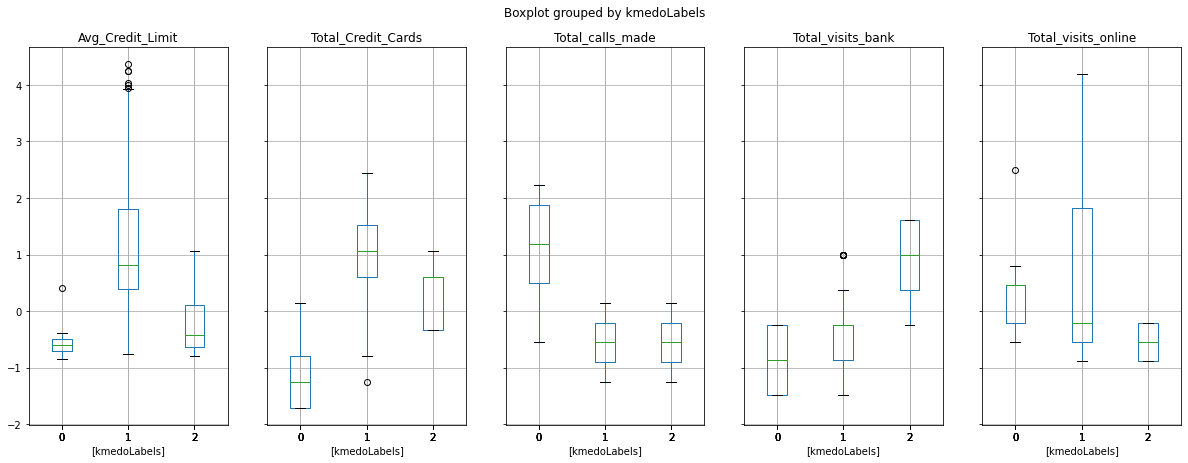

In [58]:
# Plotting boxplots with the new K-Medoids based labels

features_with_lables = ["Avg_Credit_Limit", "Total_Credit_Cards", "Total_visits_bank", "Total_visits_online", "Total_calls_made", "kmedoLabels"]

data_scaled_copy[features_with_lables].boxplot(by = 'kmedoLabels', layout = (1, 5), figsize = (20, 7))

plt.show()

**Cluster Profiles:

*Cluster 1 has the highest value for Avg_Credit_Limit,Total_Credit_Cards & Total_visits_online.

*Cluster 0 has the lowest value for Total_visits_bank.

*Cluster 0 has the highest value for Total_calls_made.

*Cluster 0 has the lowest value for Avg_Credit_Limit & Total_Credit_Cards.

*Cluster 2 has the highest value for Total_visits_bank.

*Cluster 2 has the lowest value for Total_visits_online.


Let's compare the clusters from K-Means and K-Medoids 

In [60]:
comparison = pd.concat([df_kmedoids, df_kmeans], axis = 1)[original_features]


comparison

,Avg_Credit_Limit,Avg_Credit_Limit,Total_Credit_Cards,Total_Credit_Cards,Total_visits_bank,Total_visits_bank,Total_visits_online,Total_visits_online,Total_calls_made,Total_calls_made
group_0 Mean,12203.619910,12239.819005,2.420814,2.411765,0.954751,0.945701,3.565611,3.561086,6.904977,6.891403
group_1 Mean,80625.806452,34071.428571,6.741935,5.518519,1.800000,3.484127,4.187097,0.981481,2.006452,1.992063
group_2 Mean,27260.073260,141040.000000,5.406593,8.740000,3.904762,0.600000,0.974359,10.900000,1.805861,1.080000
group_0 Median,12000.000000,12000.000000,2.000000,2.000000,1.000000,1.000000,4.000000,4.000000,7.000000,7.000000
group_1 Median,66000.000000,32000.000000,7.000000,6.000000,2.000000,3.000000,2.000000,1.000000,2.000000,2.000000
group_2 Median,19000.000000,145500.000000,6.000000,9.000000,4.000000,1.000000,1.000000,11.000000,2.000000,1.000000


**Comparing Clusters:

   Cluster  0
 * Customers who have average credit limit below 12k and own credit cards 1-4 max.
 * Customers who seldom visit bank 0-2 times.
 * Customers who visit bank online moderately (1-5 times)
 * Customers who make most phone calls (4-10 times)
 
 Cluster 1
 * Customers who have average credit limit between 34k and 80k and own credit cards 5-6 max.
 * Customers who most visited bank  1-4 times.
 * Customers who least visit bank online. (0-2 times)
 * Customers who make the least phone calls (1-2 times)
 
  Cluster 2
 * Customers who have average credit limit above 140k and own most credit cards 7-8 max.
 * Customers who least visited bank 0-3 times.
 * Customers who most visit bank online . (0-10 times)
 * Customers who make least phone calls (0-2 times)
 **